# Function Definitions

In [51]:
import numpy as np
from scipy.integrate import odeint
from statistics import mean
import matplotlib.pyplot as plt

def approx (num, rel, tol, cmpr) :
	# Check if num is lower than relative
	if cmpr == -1 :
		return (rel - num)/np.abs(rel) <= tol

	# Check absolute difference to relative
	if cmpr == 0 :
		return np.abs(num - rel)/np.abs(rel) <= tol

	# Check if num is higher than relative
	if cmpr == 1 :
		return (num - rel)/np.abs(rel) <= tol

def obj (x) :
    # objective 1  [x^2] ---> x_min = 0, f(x_min) = 0
    return np.square (x)
    
    # objective 2 [x^4 + x^3 - 10x^2 + x + 5] ---> x_min = -2.6629, f(x_min) = -37.1732
    # return np.power(x, 4) + np.power(x, 3) - 10*np.square(x) + x + 5
    
    # objective 3 [0.025*x^2 + sin(x)] ---> x_min = 1.49593, f(x_min) = -0.94125366117
    # return 0.025*np.square(x) + np.sin(x)
    
    # objective 4 [-exp(cos(x^2)) + x^2] ---> x_min = 0, f(x_min) = -e
    return -np.exp(np.cos(np.square(x))) + np.square(x)
    
    # objective 5 [|x|]
    # return np.abs (x)

def objDer (x) :
	# Objective 1
	return 2*x

	# Objective 2
	# return 4*np.pow(x,3) + 3*np.pow(x,2) - 20*np.pow(x) + 1

	# Objective 3
	# return 0.05*x + np.cos(x)
    
    # Objective 4
    # return 2*x*(1 + np.sin(np.square(x)) * np.exp(np.cos(np.square(x))))
    
    # Objective 5
    # der = np.ones (shape=x.shape)
    # der[x<0] = -1
    # return der

# PSO Loop with Diagnostic Plots

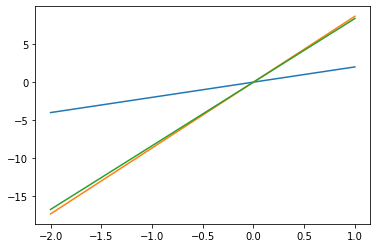

In [53]:
Nx = 25
w = 0.1
c1 = 0.8
c2 = 0.9
beta = 0.9

left = -20 
right = 20
intervalLength = right - left

xVan = intervalLength * np.random.rand(Nx, 1) - intervalLength/2
vVan = intervalLength/100.0 * np.random.rand(Nx, 1) - intervalLength/(2*100)
xMom = intervalLength * np.random.rand(Nx, 1) - intervalLength/2
vMom = intervalLength/100.0 * np.random.rand(Nx, 1) - intervalLength/(2*100)
momvec = np.zeros(shape = (Nx, 1))
pbestVan = xVan
pbestMom = xMom

numIter = 100
gbestVan = min (xVan , key = lambda x : obj(x))
gbestMom = min (xMom , key = lambda x : obj(x))

################################################################################################
for i in range (0, numIter) :
    r1 = np.random.rand (Nx, 1)
    r2 = np.random.rand (Nx, 1)
    r1m = np.random.rand (Nx, 1)
    r2m = np.random.rand (Nx, 1)
    
    vVan = w*vVan + c1*r1*(pbestVan - xVan) + c2*r2*(gbestVan - xVan)
    xVan = xVan + vVan
    
    momvec = beta*momvec + (1 - beta)*vMom
    vMom = momvec + c1*r1m*(pbestMom - xMom) + c2*r2m*(gbestMom - xMom)
    xMom = xMom + vMom
    
    less = obj(xVan) < obj(pbestVan)
    pbestVan[less] = xVan[less]
    
    less = obj(xMom) < obj(pbestMom)
    pbestMom[less] = xMom[less]
    
    gbestVan = min (pbestVan, key = lambda x : obj(x))
    gbestMom = min (pbestMom, key = lambda x : obj(x))
    
Mvan = -(c1*np.sum(r1) + c2*np.sum(r2))/(len(r1) * w)
Mmom = -(c1*np.sum(r1m) + c2*np.sum(r2m))/(len(r1m) * w)

def objDer_Van (x) :
    return Mvan*(x - gbestVan)
def objDer_Mom (x) :
    return Mmom*(x - gbestMom)

vec = np.linspace (-2, 1, 100)
plt.plot (vec, objDer (vec), vec, objDer_Van(vec), vec, objDer_Mom(vec))
plt.show()
# Blue - Real derivative
# Orange - Vanilla PSO derivative
# Green - Momentum PSO derivative